In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from AutoClass import AutoClassImpute
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
expr = pd.read_csv('C:/Users/hli45/Desktop/auto_code/sim_sensitivity_bottleneckSize/counts.csv',index_col=0)
expr_true = pd.read_csv('C:/Users/hli45/Desktop/auto_code/sim_sensitivity_bottleneckSize/truecounts.csv',index_col=0)
cellinfo = pd.read_csv('C:/Users/hli45/Desktop/auto_code/sim_sensitivity_bottleneckSize/cellinfo.csv',index_col=0)

In [3]:
X = expr.values #Splash generated scRNA-seq data with dropout
X_true = expr_true.values #Splash generated scRNA-seq data without dropout (ground truth)
Y = cellinfo['Group'].values #cell type label
unique_class = np.unique(Y)
K = len(unique_class)

In [4]:
def normalization(data):
    data = data.astype('float32')
    libs = data.sum(axis=1)
    norm_factor = np.diag(np.median(libs)/libs)
    data = np.dot(norm_factor,data)
    data = np.log2(data + 1.)
    return data

In [5]:
X_norm = normalization(X)
X_true_norm = normalization(X_true)

In [6]:
PCA_raw = PCA(n_components=50).fit_transform(X_norm)
tsne_raw = TSNE(n_components=2).fit_transform(PCA_raw)
PCA_true = PCA(n_components=50).fit_transform(X_true_norm)
tsne_true = TSNE(n_components=2).fit_transform(PCA_true)

Text(0.5, 1.0, 'With Dropout')

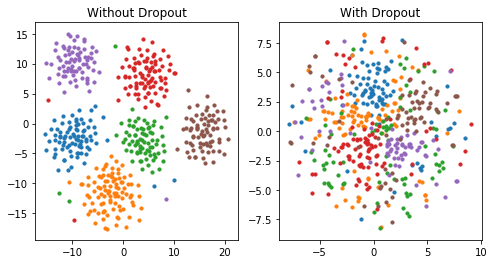

In [7]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(121)
for i in range(K):
    plt.scatter(tsne_true[Y==unique_class[i],0],
                tsne_true[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Without Dropout')
    
fig.add_subplot(122)
for i in range(K):
    plt.scatter(tsne_raw[Y==unique_class[i],0],
                tsne_raw[Y==unique_class[i],1], 
                s=10,label = unique_class[i] )
plt.title('With Dropout')

#### imputation by AutoClass

In [8]:
imp, auto = AutoClassImpute(X,num_cluster=[4,5,6]) 

500 cells and 973 genes
n_cluster = 4
n_cluster = 5
n_cluster = 6
escape time is: 102.69864249229431


In [9]:
PCA_imp = PCA(n_components=50).fit_transform(imp)
tsne_imp = TSNE(n_components=2).fit_transform(PCA_imp)

Text(0, 0.5, 'tSNE2')

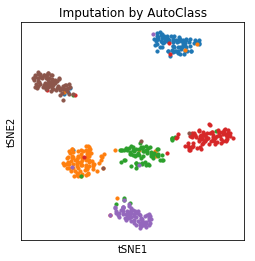

In [10]:
fig = plt.figure(figsize=(4,4))
for i in range(K):
    plt.scatter(tsne_imp[Y==unique_class[i],0],
                tsne_imp[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Imputation by AutoClass')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

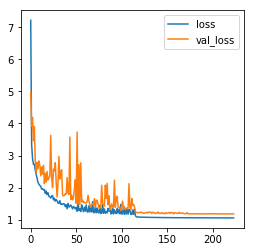

In [13]:
fig = plt.figure(figsize=(4,4))

plt.plot(auto[2].his.history['loss'],label='loss')
plt.plot(auto[2].his.history['val_loss'],label='val_loss')
plt.legend()

#### Imputation by an autoencoder (without classifier branch)

In [14]:
imp_autoencoer, auto = AutoClassImpute(X,classifier_weight=0) 

500 cells and 973 genes
no classifier layer
escape time is: 37.61751890182495


In [15]:
PCA_autoencoder = PCA(n_components=50).fit_transform(imp_autoencoer)
tsne_autoencoder = TSNE(n_components=2).fit_transform(PCA_autoencoder)

Text(0, 0.5, 'tSNE2')

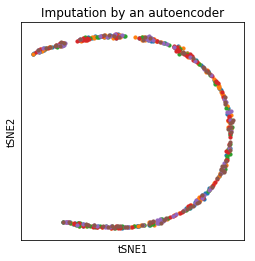

In [16]:
fig = plt.figure(figsize=(4,4))
for i in range(K):
    plt.scatter(tsne_autoencoder[Y==unique_class[i],0],
                tsne_autoencoder[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Imputation by an autoencoder')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')